In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

import os
from pandas import DataFrame
from FRVRS import nu

In [3]:

# Get all CSVs into one data frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape)
    # df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    # display(df.T)

(842663, 112)



# Total Number of Teleports

In [4]:

# Total Number of Teleports
if nu.pickle_exists('teleport_count_df'):
    teleport_count_df = nu.load_object('teleport_count_df')
else:
    
    # Initialize an empty list to store rows
    rows_list = []
    
    # Loop through each unique combination of 'session_uuid' and 'scene_id'
    for (session_uuid, scene_id), scene_df in frvrs_logs_df.groupby(fu.scene_groupby_columns):
    
        # Create a dictionary to store row data for this group
        row_dict = {}
        
        # Populate the row_dict with values from the groupby_columns
        for cn in fu.scene_groupby_columns: row_dict[cn] = eval(cn)
        
        # Set the logger version and scene categories
        logger_version = fu.get_logger_version(scene_df)
        row_dict['logger_version'] = logger_version
        is_scene_aborted = fu.get_is_scene_aborted(scene_df)
        row_dict['is_scene_aborted'] = is_scene_aborted
        scene_type = fu.get_scene_type(scene_df)
        row_dict['scene_type'] = scene_type
    
        # Count the number of rows in the filtered dataframe
        row_dict['teleport_count'] = fu.get_teleport_count(scene_df)
    
        # Add the row dictionary to the list of rows
        rows_list.append(row_dict)
    
    # Create a data frame from the list of row dictionaries
    teleport_count_df = DataFrame(rows_list)
    nu.store_objects(teleport_count_df=teleport_count_df)

Pickling to C:\Users\DaveBabbitt\Documents\GitHub\itm-analysis-reporting\saves\pkl\teleport_count_df.pkl


In [5]:

teleport_count_df.sort_values('teleport_count')

,session_uuid,scene_id,logger_version,is_scene_aborted,scene_type,teleport_count
0,009b848c-ea64-4f22-bd40-711213a3d327,0,1.3,False,Orientation,0
385,5254234d-5334-44d0-a97b-d0e098c129a9,0,1.0,False,Orientation,0
382,524d5418-62f4-4834-9f1e-47202c30e667,0,1.0,False,Orientation,0
379,51f8d40c-9550-4ef1-a71c-e030c0a08f29,0,1.0,False,Orientation,0
861,c8fb0ff7-403a-40d2-8ecb-6537bd4fae16,0,1.0,False,Orientation,0
...,...,...,...,...,...,...
707,9f03c005-21d8-4934-8bb9-7152347726d1,2,1.3,False,Triage,141
326,4226ad6c-bb0a-4df0-8c4a-64c312927578,2,1.0,False,Triage,144
949,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,1,1.3,False,Triage,152
1010,e4b17764-a999-4733-b455-1968588effc8,1,1.0,False,Triage,163


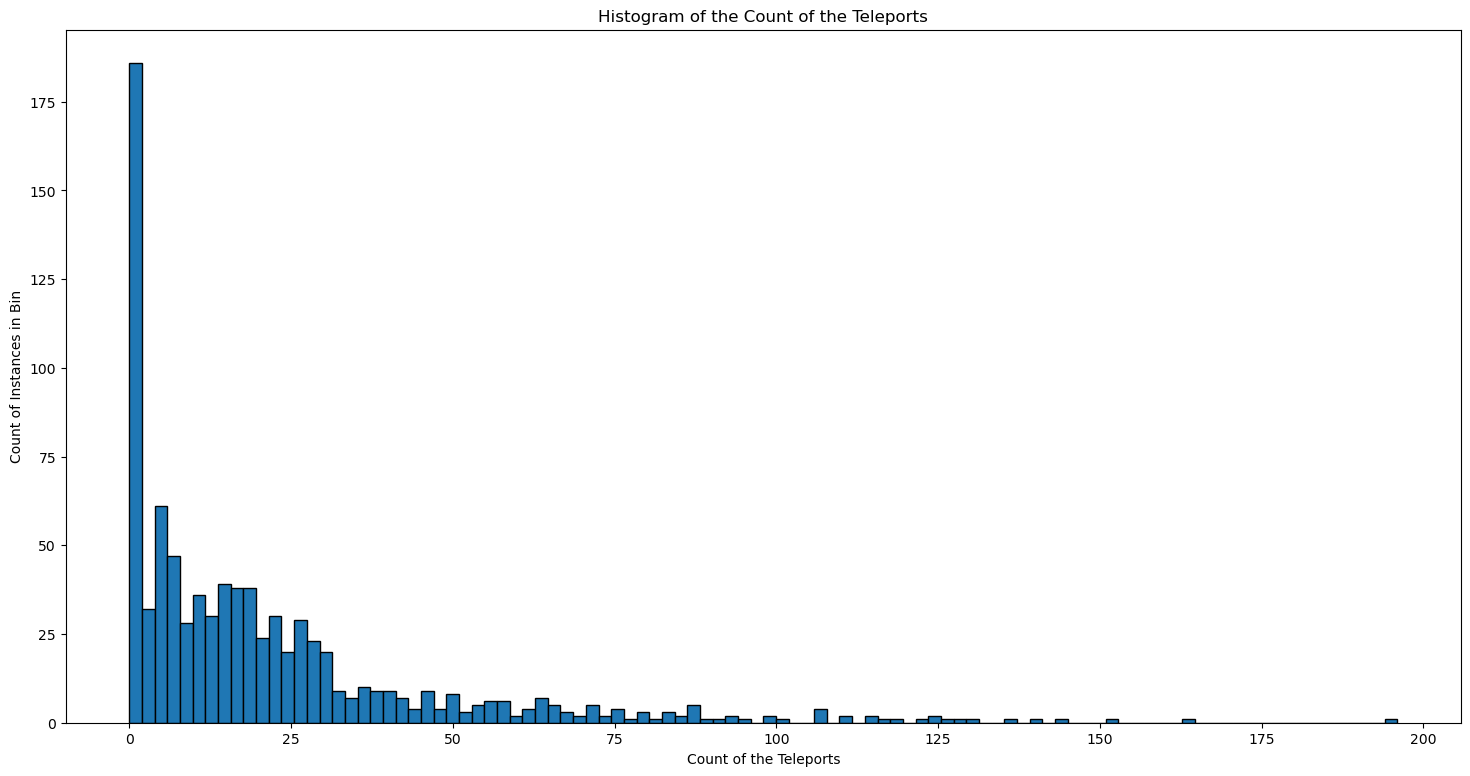

In [6]:

# Display a histogram of the distribution of the number of teleports
xlabel = 'Count of the Teleports'
get_xtick_text = lambda text_obj: int(text_obj.get_position()[0])
title = 'Histogram of the Count of the Teleports'
mask_series = (teleport_count_df.scene_type == 'Triage') & (teleport_count_df.is_scene_aborted == False)
ax = nu.plot_histogram(teleport_count_df[mask_series], 'teleport_count', xlabel=xlabel, xtick_text_fn=get_xtick_text, title=title)

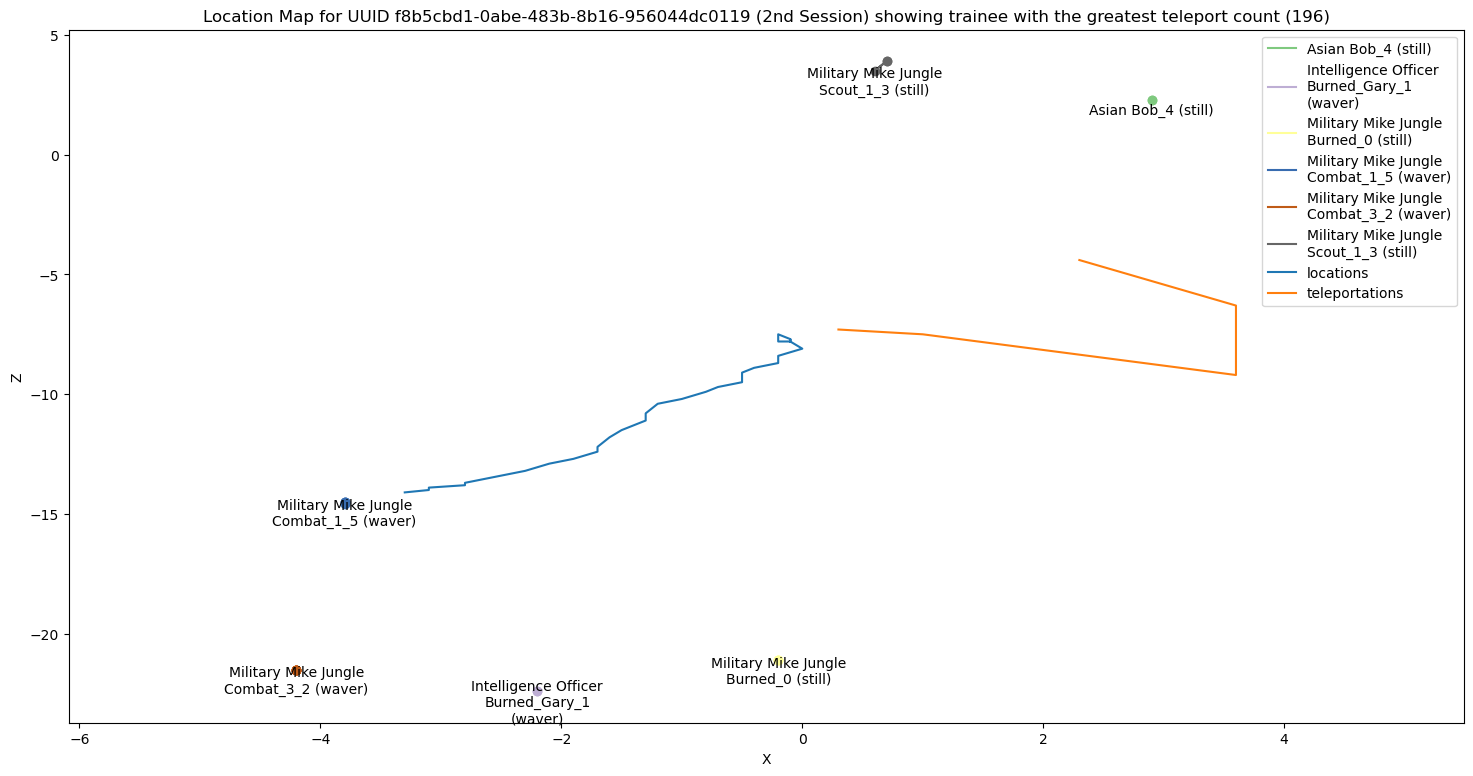

In [7]:

# Get scene with the greatest teleport count, v1.3
mask_series = (teleport_count_df.logger_version == 1.3)
fu.visualize_extreme_player_movement(
    frvrs_logs_df, teleport_count_df, 'teleport_count', mask_series=mask_series, is_ascending=False,
    humanize_type='intword', title_str='greatest teleport count', verbose=False
)

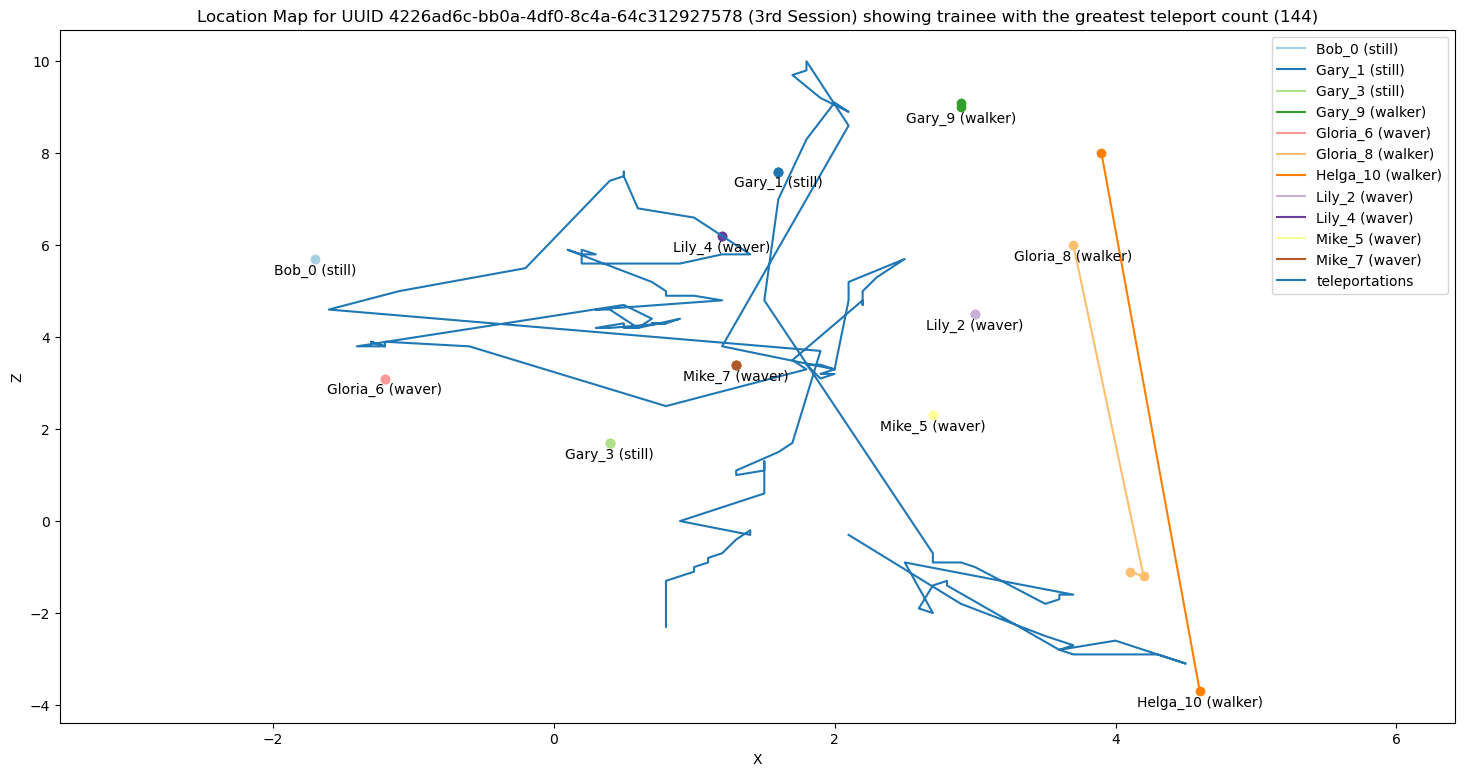

In [8]:

# Get scene with the greatest teleport count, v1.0
mask_series = (teleport_count_df.logger_version == 1.0)
fu.visualize_extreme_player_movement(
    frvrs_logs_df, teleport_count_df, 'teleport_count', mask_series=mask_series, is_ascending=False,
    humanize_type='intword', title_str='greatest teleport count', verbose=False
)

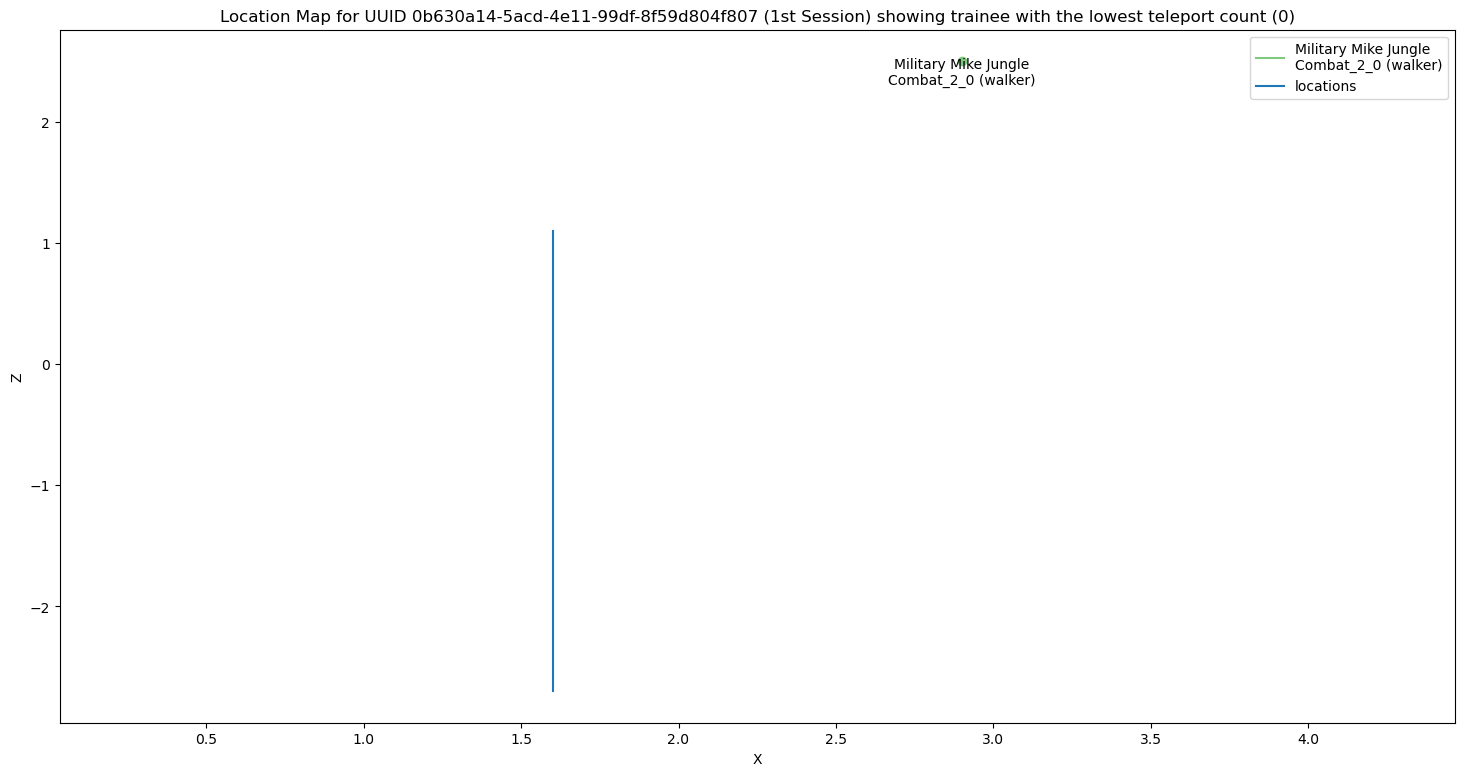

In [9]:

# Get scene with the lowest teleport count, v1.3
mask_series = (teleport_count_df.logger_version == 1.3)
fu.visualize_extreme_player_movement(
    frvrs_logs_df, teleport_count_df, 'teleport_count', mask_series=mask_series, is_ascending=True,
    humanize_type='intword', title_str='lowest teleport count', verbose=False
)

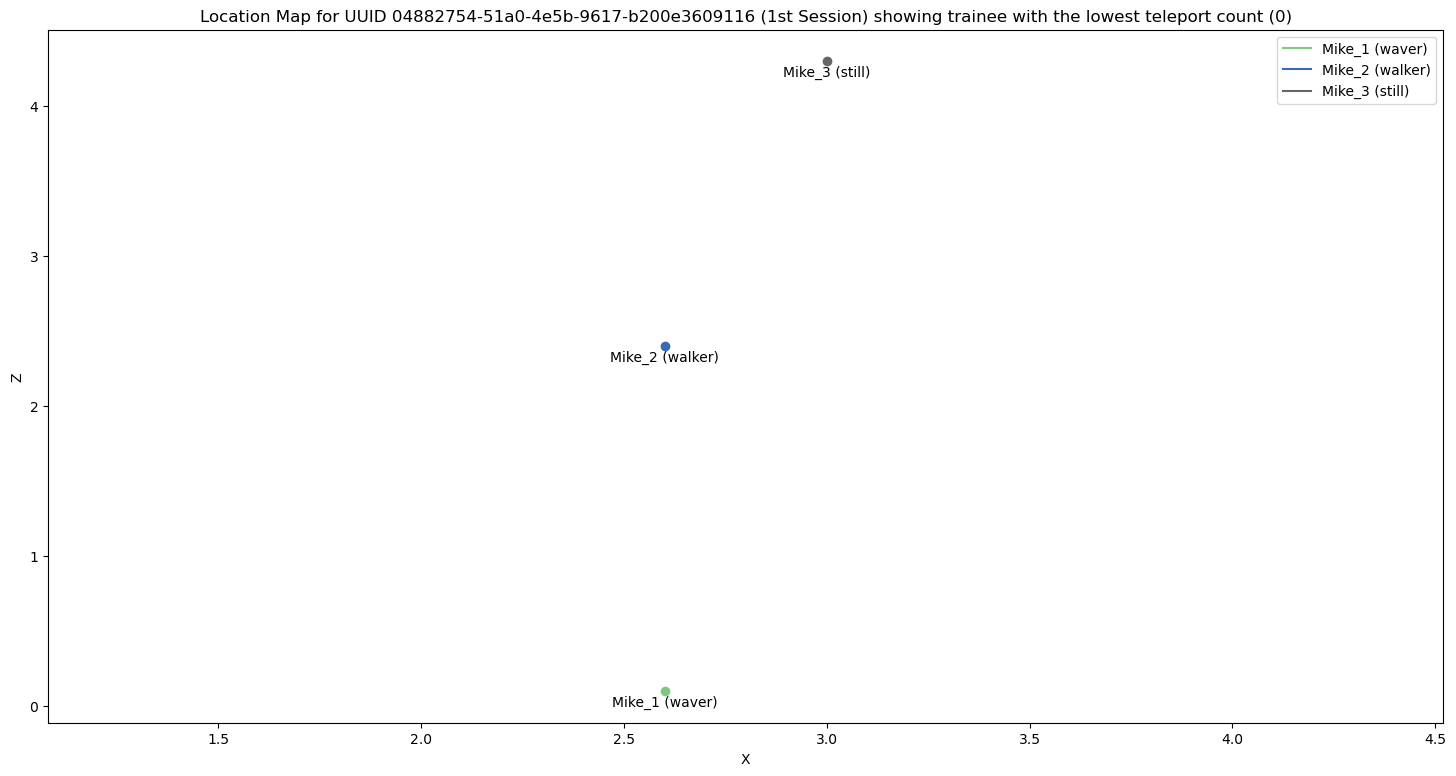

In [10]:

# Get scene with the lowest teleport count, v1.0
mask_series = (teleport_count_df.logger_version == 1.0)
fu.visualize_extreme_player_movement(
    frvrs_logs_df, teleport_count_df, 'teleport_count', mask_series=mask_series, is_ascending=True,
    humanize_type='intword', title_str='lowest teleport count', verbose=False
)